In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
student_data = pd.read_csv('/content/Student_Performance.csv')
student_data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [34]:
student_data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [35]:
student_data.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [36]:
student_data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
student_data['Extracurricular Activities'] = le.fit_transform(student_data['Extracurricular Activities'])

zip

In [38]:
x = student_data.iloc[:,:-1].values
y = student_data.iloc[:,-1].values
x

array([[ 7, 99,  1,  9,  1],
       [ 4, 82,  0,  4,  2],
       [ 8, 51,  1,  7,  2],
       ...,
       [ 6, 83,  1,  8,  5],
       [ 9, 97,  1,  7,  0],
       [ 7, 74,  0,  8,  1]])

In [39]:
y

array([91., 65., 45., ..., 74., 95., 64.])

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

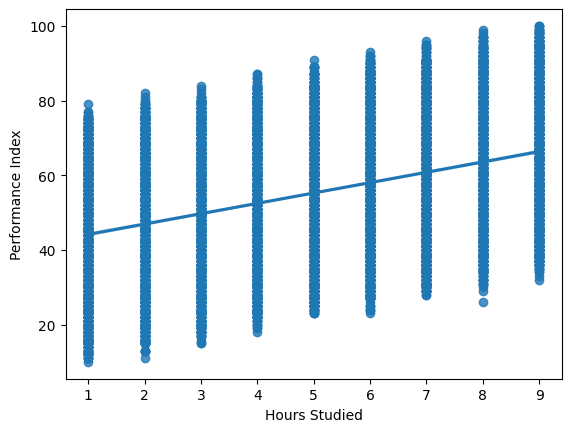

In [40]:
import seaborn as sns
sns.regplot(x = student_data['Hours Studied'], y = student_data['Performance Index'])

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

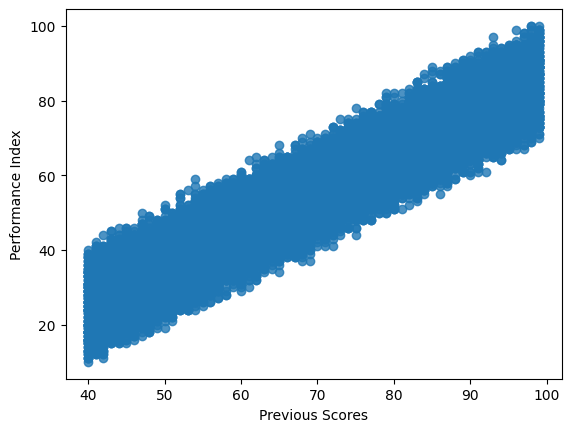

In [41]:
sns.regplot(x = student_data['Previous Scores'], y = student_data['Performance Index'])

<Axes: ylabel='Performance Index'>

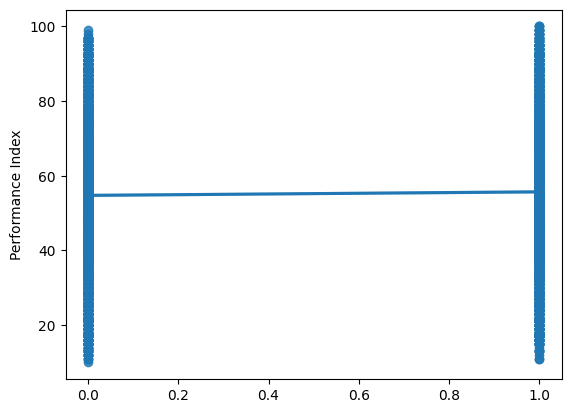

In [42]:
sns.regplot(x = encoder, y = student_data['Performance Index'])

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

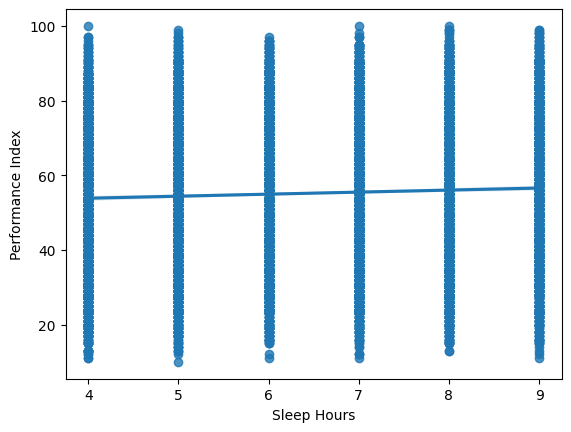

In [43]:
sns.regplot(x = student_data['Sleep Hours'], y = student_data['Performance Index'])

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

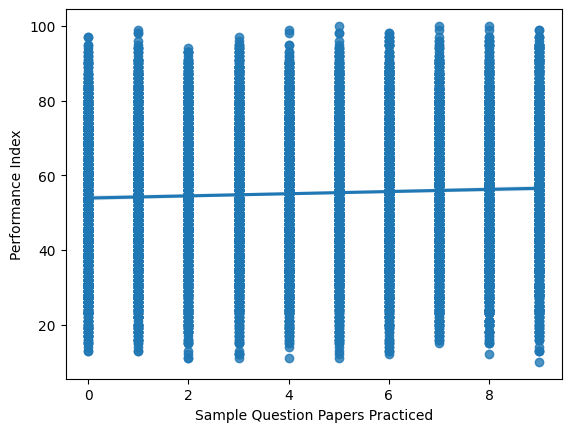

In [44]:
sns.regplot(x = student_data['Sample Question Papers Practiced'], y = student_data['Performance Index'])

In [45]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [46]:
x_train

array([[ 4, 99,  1,  6,  1],
       [ 6, 90,  1,  9,  3],
       [ 8, 57,  0,  6,  1],
       ...,
       [ 9, 48,  0,  7,  6],
       [ 1, 47,  0,  9,  0],
       [ 2, 46,  0,  6,  6]])

In [47]:
x_test

array([[ 5, 69,  0,  8,  2],
       [ 2, 46,  1,  4,  8],
       [ 7, 56,  1,  7,  5],
       ...,
       [ 5, 48,  1,  6,  4],
       [ 3, 86,  1,  9,  5],
       [ 6, 43,  1,  6,  4]])

In [48]:
y_train

array([82., 79., 50., ..., 44., 20., 24.])

In [49]:
y_test

array([51., 20., 46., ..., 33., 69., 29.])

In [50]:
from sklearn.linear_model import LinearRegression
# Create Object(model)
model = LinearRegression()
# fit model
model.fit(x_train, y_train)
# Predict value
y_pred = model.predict(x_test)
y_pred

array([54.74728554, 22.61884434, 47.93665124, ..., 33.42451751,
       67.92578967, 31.20587077])

In [51]:
df = pd.DataFrame({'Actual_value':y_test, 'Predicted_value':y_pred, 'Difference': y_test - y_pred})
df

,Actual_value,Predicted_value,Difference
0,51.0,54.747286,-3.747286
1,20.0,22.618844,-2.618844
2,46.0,47.936651,-1.936651
3,28.0,31.340099,-3.340099
4,41.0,43.059743,-2.059743
...,...,...,...
2995,32.0,31.819775,0.180225
2996,40.0,37.503045,2.496955
2997,33.0,33.424518,-0.424518
2998,69.0,67.925790,1.074210


In [53]:
print("Slope is")
list(zip(x, model.coef_))

Slope is


[(array([ 7, 99,  1,  9,  1]), 2.8589522305235064),
 (array([ 4, 82,  0,  4,  2]), 1.0155197942880816),
 (array([ 8, 51,  1,  7,  2]), 0.5817128541736178),
 (array([ 5, 52,  1,  5,  2]), 0.47967675981703317),
 (array([ 7, 75,  0,  8,  5]), 0.19039415655051053)]

In [54]:
# Mean Absoulte Percentage error
from sklearn.metrics import mean_absolute_percentage_error
print("Error percentage is ", mean_absolute_percentage_error(y_test, y_pred))

Error percentage is  0.03504200252156806


In [55]:
# R2_Score
from sklearn.metrics import r2_score
print("R2 score is", r2_score(y_test, y_pred))

R2 score is 0.9890110607021136
